 # **Challenge Telecom-X**

## **Extracción de datos en formato JSON.**

In [4]:
import pandas as pd

# Cargar y aplanar el JSON
telecom = pd.read_json("TelecomX_Data.json")
telecom_flat = pd.json_normalize(telecom.to_dict(orient='records'))

# Renombrar columnas para mayor legibilidad
telecom_flat.columns = telecom_flat.columns.str.replace('.', '_').str.lower()


In [5]:
telecom_flat.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
telecom_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

## **Transformación de datos**

### **Limpieza por columnas**

#### **customerID**

In [7]:
telecom_flat['customerid'] = telecom_flat['customerid'].astype(str).str.strip()

#### **churn**

In [8]:
telecom_flat['churn'] = telecom_flat['churn'].str.strip().str.title()
telecom_flat = telecom_flat[telecom_flat['churn'].isin(['Yes', 'No'])]  # quitar vacíos

#### **Gender**

In [9]:
telecom_flat['customer_gender'] = telecom_flat['customer_gender'].str.strip().str.title()

#### **SeniorCitizen**

In [10]:
telecom_flat['customer_seniorcitizen'] = telecom_flat['customer_seniorcitizen'].astype(int)

#### **Partner y Dependents**

In [11]:
telecom_flat['customer_tenure'] = pd.to_numeric(telecom_flat['customer_tenure'], errors='coerce')

#### **tenure**

In [12]:
telecom_flat['customer_tenure'] = pd.to_numeric(telecom_flat['customer_tenure'], errors='coerce')

#### **Phoneservice y Multiplelines**

In [13]:
telecom_flat['phone_phoneservice'] = telecom_flat['phone_phoneservice'].str.strip().str.title()
telecom_flat['phone_multiplelines'] = telecom_flat['phone_multiplelines'].str.strip().str.title()

#### **Servicios de internet**

In [14]:
cols_internet = [
    'internet_internetservice', 'internet_onlinesecurity', 'internet_onlinebackup',
    'internet_deviceprotection', 'internet_techsupport',
    'internet_streamingtv', 'internet_streamingmovies'
]
for col in cols_internet:
    telecom_flat[col] = telecom_flat[col].str.strip().str.title()

#### **Contract, Paperlessbilling, Paymentmethod**

In [15]:
telecom_flat['account_contract'] = telecom_flat['account_contract'].str.strip().str.title()
telecom_flat['account_paperlessbilling'] = telecom_flat['account_paperlessbilling'].str.strip().str.title()
telecom_flat['account_paymentmethod'] = telecom_flat['account_paymentmethod'].str.strip().str.title()

#### **Charges_Monthly y Charges_Total**

In [16]:
telecom_flat['account_charges_monthly'] = pd.to_numeric(telecom_flat['account_charges_monthly'], errors='coerce')
telecom_flat['account_charges_total'] = pd.to_numeric(telecom_flat['account_charges_total'], errors='coerce')

#### **Eliminar registros con datos faltantes críticos**

In [17]:
# Por ejemplo, si total charges o tenure está vacío, no sirve para análisis
telecom_flat.dropna(subset=['account_charges_total', 'customer_tenure'], inplace=True)


#### **Resetear índice**

In [18]:
telecom_flat.reset_index(drop=True, inplace=True)
telecom_flat.tail()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
7027,9987-LUTYD,No,Female,0,No,No,13,Yes,No,Dsl,...,No,No,Yes,No,No,One Year,No,Mailed Check,55.15,742.90
7028,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber Optic,...,No,No,No,No,Yes,Month-To-Month,Yes,Electronic Check,85.10,1873.70
7029,9992-UJOEL,No,Male,0,No,No,2,Yes,No,Dsl,...,Yes,No,No,No,No,Month-To-Month,Yes,Mailed Check,50.30,92.75
7030,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,Dsl,...,No,Yes,Yes,No,Yes,Two Year,No,Mailed Check,67.85,4627.65
7031,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No Phone Service,Dsl,...,Yes,Yes,No,Yes,Yes,Two Year,No,Electronic Check,59.00,3707.60


#### **Creación de columna "Cuentas_Diarias"**

Para crear la columna "Cuentas_Diarias" a partir de la facturación mensual (account_charges_monthly), simplemente vamos a dividir ese valor entre 30, como estimación del promedio de días por mes.

In [19]:
# Crear la columna Cuentas_Diarias como facturación mensual / 30
telecom_flat['cuentas_diarias'] = telecom_flat['account_charges_monthly'] / 30
# Ver las primeras filas para revisar la nueva columna
telecom_flat[['account_charges_monthly', 'cuentas_diarias']].head()

,account_charges_monthly,cuentas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


### **Estandarización y transformación de datos**

#### **1. Conversión de valores "Yes"/"No" a binarios (1 y 0)**

Aplicamos esto a todas las columnas que contienen respuestas de tipo sí/no:

In [20]:
# Lista de columnas booleanas
binarias = [
    'churn', 'customer_partner', 'customer_dependents',
    'phone_phoneservice', 'account_paperlessbilling'
]

# Añadir columnas binarias de servicios opcionales
servicios = [
    'internet_onlinesecurity', 'internet_onlinebackup',
    'internet_deviceprotection', 'internet_techsupport',
    'internet_streamingtv', 'internet_streamingmovies',
    'internet_internetservice', 'phone_multiplelines'
]

# Convertir "Yes"/"No" → 1/0
for col in binarias + servicios:
    telecom_flat[col] = telecom_flat[col].map({'Yes': 1, 'No': 0})


#### **2. Conversión de "SeniorCitizen" a tipo categórico con nombre claro**

In [21]:
telecom_flat['es_adulto_mayor'] = telecom_flat['customer_seniorcitizen'].map({1: 'Sí', 0: 'No'})

#### **3. Renombrar columnas a nombres en español más comprensibles**

In [22]:
telecom_flat.rename(columns={
    'customer_gender': 'genero',
    'customer_partner': 'tiene_pareja',
    'customer_dependents': 'tiene_dependientes',
    'customer_tenure': 'meses_contratado',
    'phone_phoneservice': 'servicio_telefonico',
    'phone_multiplelines': 'multiples_lineas',
    'internet_internetservice': 'tipo_internet',
    'internet_onlinesecurity': 'seguridad_online',
    'internet_onlinebackup': 'respaldo_online',
    'internet_deviceprotection': 'proteccion_dispositivo',
    'internet_techsupport': 'soporte_tecnico',
    'internet_streamingtv': 'tv_streaming',
    'internet_streamingmovies': 'peliculas_streaming',
    'account_contract': 'tipo_contrato',
    'account_paperlessbilling': 'factura_digital',
    'account_paymentmethod': 'metodo_pago',
    'account_charges_monthly': 'cargo_mensual',
    'account_charges_total': 'cargo_total',
    'cuentas_diarias': 'cargo_diario',
}, inplace=True)

#### **4. Estandarizar texto categórico (género, contrato, método de pago, tipo de internet)**

In [23]:
cat_cols = ['genero', 'tipo_internet', 'tipo_contrato', 'metodo_pago']

for col in cat_cols:
    telecom_flat[col] = telecom_flat[col].astype(str).str.lower().str.replace('-', ' ', regex=False).str.strip()

#### **5.Resultado final (verificación rápida)**

In [24]:
telecom_flat.head()
telecom_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerid              7032 non-null   object 
 1   churn                   7032 non-null   int64  
 2   genero                  7032 non-null   object 
 3   customer_seniorcitizen  7032 non-null   int64  
 4   tiene_pareja            7032 non-null   int64  
 5   tiene_dependientes      7032 non-null   int64  
 6   meses_contratado        7032 non-null   int64  
 7   servicio_telefonico     7032 non-null   int64  
 8   multiples_lineas        6352 non-null   float64
 9   tipo_internet           7032 non-null   object 
 10  seguridad_online        5512 non-null   float64
 11  respaldo_online         5512 non-null   float64
 12  proteccion_dispositivo  5512 non-null   float64
 13  soporte_tecnico         5512 non-null   float64
 14  tv_streaming            5512 non-null   

# **Carga y Análisis (L - Load&Analysis)**

## **Análisis descriptivo**

#### **1. Estadísticas básicas para variables numéricas**

Esto te devuelve:

count: cantidad de registros

mean: media

std: desviación estándar

min, 25%, 50%, 75%, max: percentiles (incluye la mediana en el 50%)

In [25]:
# Seleccionar columnas numéricas
telecom_flat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
churn,7032.0,0.265785,0.441782,0.000000,0.00000,0.000,1.000000,1.000000
customer_seniorcitizen,7032.0,0.162400,0.368844,0.000000,0.00000,0.000,0.000000,1.000000
tiene_pareja,7032.0,0.482509,0.499729,0.000000,0.00000,0.000,1.000000,1.000000
tiene_dependientes,7032.0,0.298493,0.457629,0.000000,0.00000,0.000,1.000000,1.000000
meses_contratado,7032.0,32.421786,24.545260,1.000000,9.00000,29.000,55.000000,72.000000
servicio_telefonico,7032.0,0.903299,0.295571,0.000000,1.00000,1.000,1.000000,1.000000
multiples_lineas,6352.0,0.467097,0.498955,0.000000,0.00000,0.000,1.000000,1.000000
seguridad_online,5512.0,0.365566,0.481632,0.000000,0.00000,0.000,1.000000,1.000000
respaldo_online,5512.0,0.439949,0.496426,0.000000,0.00000,0.000,1.000000,1.000000
proteccion_dispositivo,5512.0,0.438679,0.496271,0.000000,0.00000,0.000,1.000000,1.000000


#### ** 2. Calcular mediana directamente**

In [26]:
telecom_flat.median(numeric_only=True)

,0
churn,0.000
customer_seniorcitizen,0.000
tiene_pareja,0.000
tiene_dependientes,0.000
meses_contratado,29.000
servicio_telefonico,1.000
multiples_lineas,0.000
seguridad_online,0.000
respaldo_online,0.000
proteccion_dispositivo,0.000


#### **3. Distribución de variables clave**

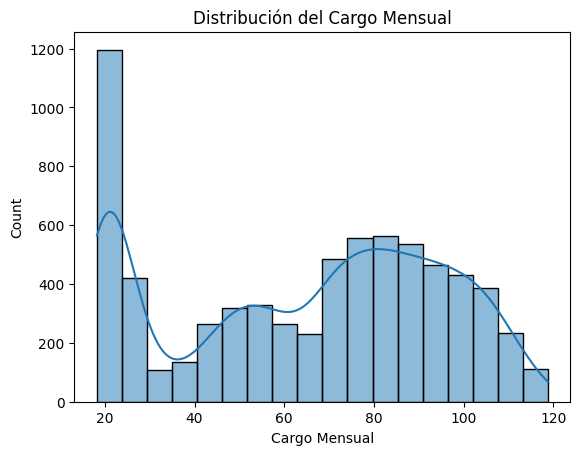

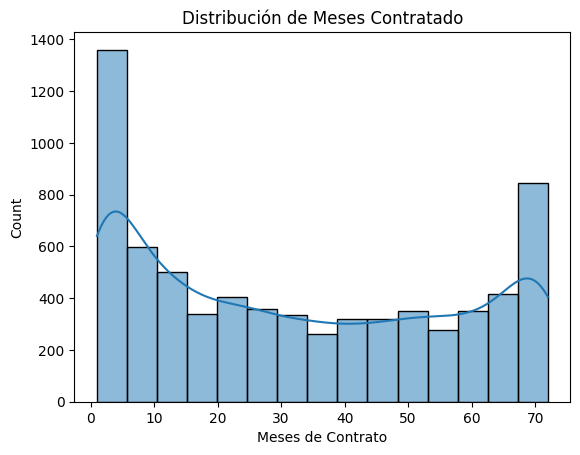

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de cargo mensual
sns.histplot(telecom_flat['cargo_mensual'], kde=True)
plt.title('Distribución del Cargo Mensual')
plt.xlabel('Cargo Mensual')
plt.show()

# Histograma de meses contratados (tenure)
sns.histplot(telecom_flat['meses_contratado'], kde=True)
plt.title('Distribución de Meses Contratado')
plt.xlabel('Meses de Contrato')
plt.show()

#### **4. Comparar métricas por grupos (ej. Churn vs No Churn)**

In [28]:
# Promedios comparativos por churn
telecom_flat.groupby('churn')[['cargo_mensual', 'cargo_total', 'meses_contratado']].agg(['mean', 'median', 'std'])

cargo_mensual                    cargo_total                        \
               mean median        std         mean   median          std   
churn                                                                      
0         61.307408  64.45  31.094557  2555.344141  1683.60  2329.456984   
1         74.441332  79.65  24.666053  1531.796094   703.55  1890.822994   

      meses_contratado                    
                  mean median        std  
churn                                     
0            37.650010   38.0  24.076940  
1            17.979133   10.0  19.531123

#### **5. Correlación entre variables numéricas**

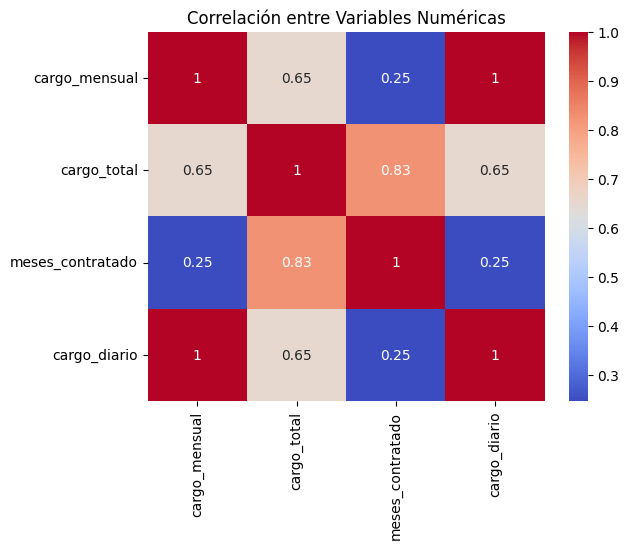

In [29]:
# Matriz de correlación
correlaciones = telecom_flat[['cargo_mensual', 'cargo_total', 'meses_contratado', 'cargo_diario']].corr()

# Mapa de calor
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables Numéricas')
plt.show()

In [30]:
# Este gráfico te permitirá:
# Visualizar correlaciones positivas y negativas.
# Comparar rápidamente qué variables están relacionadas (por ejemplo, cargo_mensual vs cargo_diario).
import plotly.express as px
import pandas as pd

# Seleccionamos variables numéricas de interés
variables_numericas = telecom_flat[['cargo_mensual', 'cargo_total', 'meses_contratado', 'cargo_diario']]

# Calculamos la matriz de correlación
cor_matrix = variables_numericas.corr().round(2)

# Convertimos a formato largo (tidy) para plotly
cor_df = cor_matrix.reset_index().melt(id_vars='index')
cor_df.columns = ['Variable1', 'Variable2', 'Correlacion']

# Creamos el heatmap
fig = px.imshow(
    cor_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    zmin=-1, zmax=1,
    title="Matriz de Correlación entre Variables Numéricas"
)

fig.update_layout(
    xaxis_title='Variables',
    yaxis_title='Variables',
    width=600,
    height=500
)

fig.show()

## **Distribución de evasión**

#### **1. Distribución de churn en valores absolutos y relativos**



In [31]:
# Conteo absoluto
telecom_flat['churn'].value_counts()

# Porcentaje
telecom_flat['churn'].value_counts(normalize=True) * 100

,proportion
churn,
0,73.421502
1,26.578498


#### **2. Gráfico de barras (Plotly)**

In [32]:
import plotly.express as px

# Conteo para gráfico
churn_count = telecom_flat['churn'].value_counts().reset_index()
churn_count.columns = ['Estado', 'Cantidad']

# Gráfico de barras
fig = px.bar(
    churn_count,
    x='Estado',
    y='Cantidad',
    color='Estado',
    text='Cantidad',
    title='Distribución de Clientes por Churn',
    color_discrete_map={'Yes': 'red', 'No': 'green'}
)
fig.update_layout(showlegend=False)
fig.show()

#### **3. Gráfico de pastel (Pie chart)**

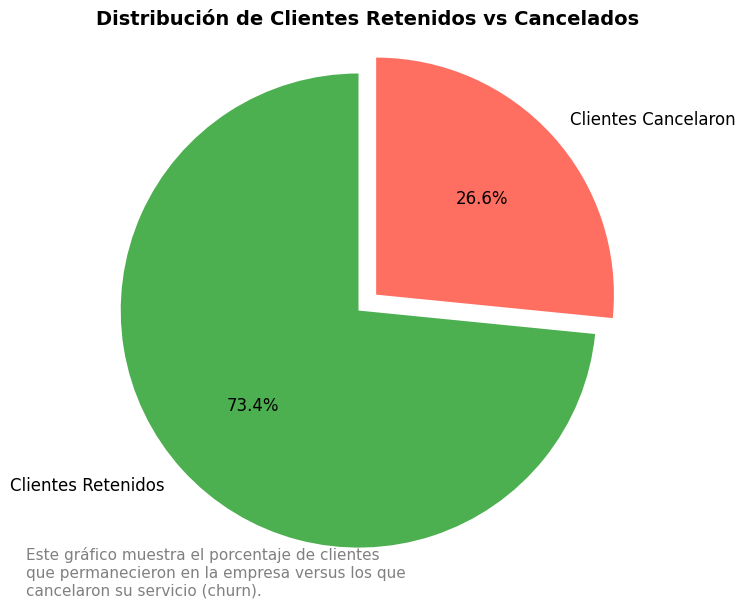

In [33]:
import matplotlib.pyplot as plt

# Preparar los datos
labels = ['Clientes Retenidos', 'Clientes Cancelaron']
sizes = telecom_flat['churn'].value_counts(normalize=True).sort_index() * 100
colors = ['#4CAF50', '#FF6F61']  # verde y rojo suave
explode = (0, 0.1)  # destacar a los que cancelaron

# Crear gráfico
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops=dict(color="black", fontsize=12)
)

# Aspecto circular y título
ax.axis('equal')
plt.title('Distribución de Clientes Retenidos vs Cancelados', fontsize=14, fontweight='bold')

# Agregar explicación adicional en el gráfico
plt.text(-1.4, -1.2,
         'Este gráfico muestra el porcentaje de clientes\n'
         'que permanecieron en la empresa versus los que\n'
         'cancelaron su servicio (churn).',
         fontsize=11, color='gray')

plt.show()

## **Recuento de evasión por variables categóricas**

#### **1. Churn por tipo de contrato**

 Interpretación esperada: clientes con contrato mensual suelen cancelar más que los de contrato anual o bianual.

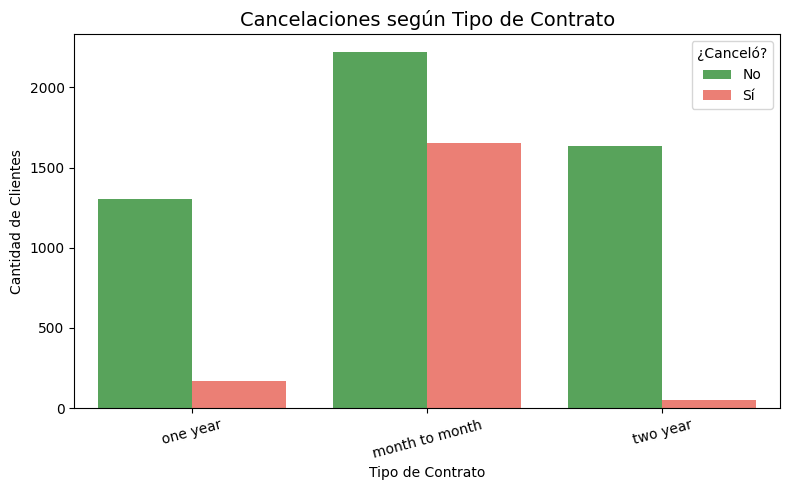

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=telecom_flat, x='tipo_contrato', hue='churn', palette=['#4CAF50', '#FF6F61'])

plt.title('Cancelaciones según Tipo de Contrato', fontsize=14)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='¿Canceló?', labels=['No', 'Sí'])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

#### **2. Churn por género**

En general, no suele haber diferencias fuertes por género, pero este gráfico lo confirma.

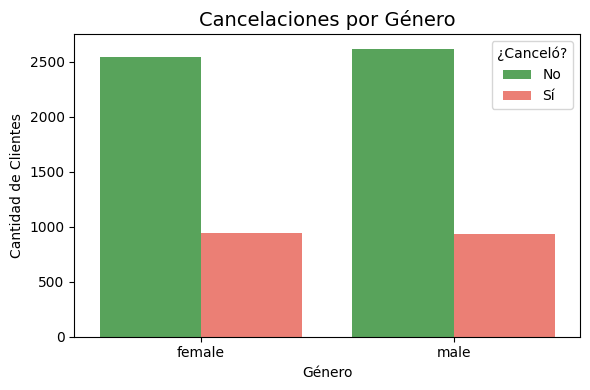

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(data=telecom_flat, x='genero', hue='churn', palette=['#4CAF50', '#FF6F61'])

plt.title('Cancelaciones por Género', fontsize=14)
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='¿Canceló?', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

#### **3. Churn según si tiene soporte técnico contratado**

Aquí se puede ver si no tener soporte técnico está asociado con mayor churn (algo común si los clientes tienen malas experiencias sin asistencia).

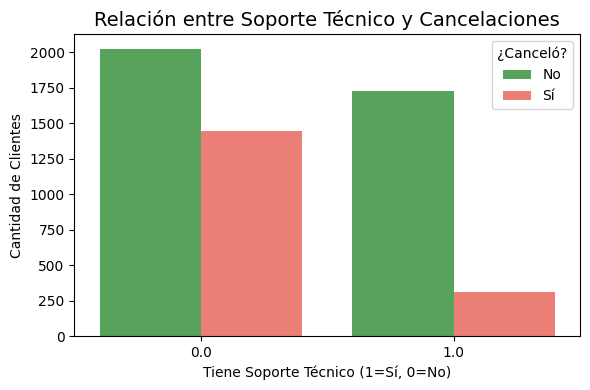

In [36]:
plt.figure(figsize=(6, 4))
sns.countplot(data=telecom_flat, x='soporte_tecnico', hue='churn', palette=['#4CAF50', '#FF6F61'])

plt.title('Relación entre Soporte Técnico y Cancelaciones', fontsize=14)
plt.xlabel('Tiene Soporte Técnico (1=Sí, 0=No)')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='¿Canceló?', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

## **Conteo de evasión por variables numéricas**

#### **1. Distribución de cargo_total por churn**

los clientes que gastaron poco en total tienden a haber cancelado temprano, lo que indica falta de fidelización.

<ipython-input-37-b494a08fde98>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




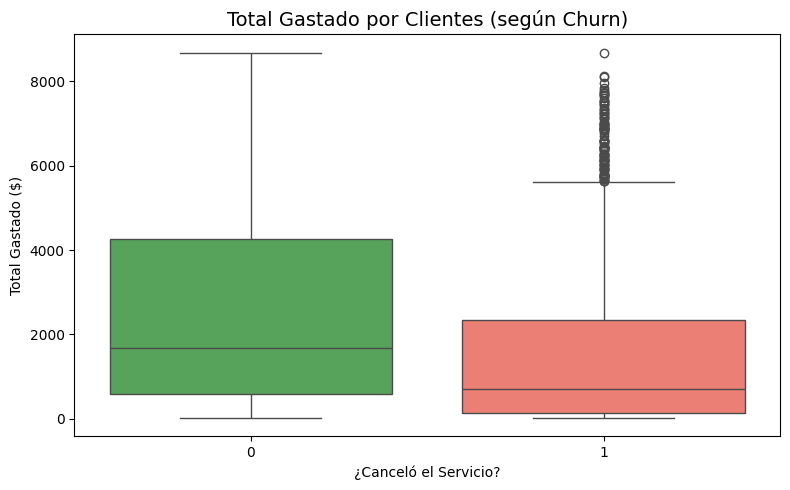

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=telecom_flat, x='churn', y='cargo_total', palette=['#4CAF50', '#FF6F61'])

plt.title('Total Gastado por Clientes (según Churn)', fontsize=14)
plt.xlabel('¿Canceló el Servicio?')
plt.ylabel('Total Gastado ($)')
plt.tight_layout()
plt.show()

#### **2. Distribución de meses_contratado por churn**

Aquí se suele ver que quienes cancelan tienen menor antigüedad, lo que sugiere problemas en los primeros meses de experiencia del cliente.



<ipython-input-38-4bce293d3eb5>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




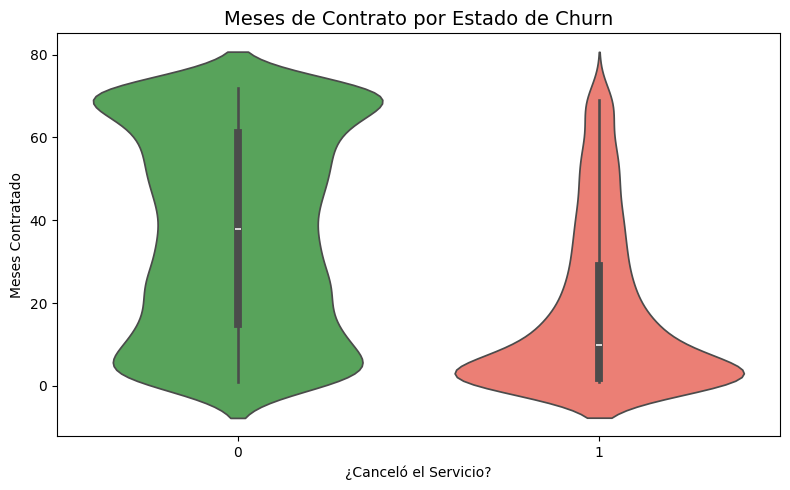

In [38]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=telecom_flat, x='churn', y='meses_contratado', palette=['#4CAF50', '#FF6F61'])

plt.title('Meses de Contrato por Estado de Churn', fontsize=14)
plt.xlabel('¿Canceló el Servicio?')
plt.ylabel('Meses Contratado')
plt.tight_layout()
plt.show()

 #### **3. Distribución de cargo_mensual por churn**

 Clientes con cargos mensuales más altos pueden ser más propensos a cancelar si no perciben suficiente valor.

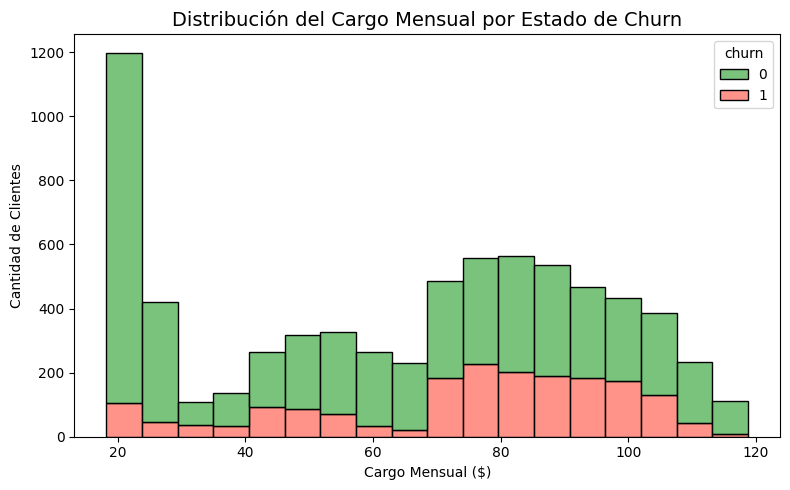

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(data=telecom_flat, x='cargo_mensual', hue='churn', multiple='stack', palette=['#4CAF50', '#FF6F61'])

plt.title('Distribución del Cargo Mensual por Estado de Churn', fontsize=14)
plt.xlabel('Cargo Mensual ($)')
plt.ylabel('Cantidad de Clientes')
plt.tight_layout()
plt.show()

#### **DASHBOARD - Análisis de variables numéricas por Churn**

- Gráfico 1: Clientes que cancelan tienden a haber gastado menos (menos tiempo en la empresa).

- Gráfico 2: La mayoría de cancelaciones ocurren en los primeros meses.

- Gráfico 3: Churn puede aumentar con cargos mensuales altos (si no hay percepción de valor).

In [40]:
import plotly.express as px

# 1. Distribución del total gastado (cargo_total)
fig1 = px.box(
    telecom_flat,
    x='churn',
    y='cargo_total',
    color='churn',
    title='Total Gastado por Clientes (según Churn)',
    labels={'churn': '¿Canceló el Servicio?', 'cargo_total': 'Total Gastado ($)'},
    color_discrete_map={'No': '#4CAF50', 'Yes': '#FF6F61'}
)
fig1.show()

# 2. Distribución del tiempo de contrato (meses_contratado)
fig2 = px.violin(
    telecom_flat,
    x='churn',
    y='meses_contratado',
    color='churn',
    box=True, points='all',
    title='Meses de Contrato por Estado de Churn',
    labels={'churn': '¿Canceló el Servicio?', 'meses_contratado': 'Meses Contratado'},
    color_discrete_map={'No': '#4CAF50', 'Yes': '#FF6F61'}
)
fig2.show()

# 3. Distribución del cargo mensual (cargo_mensual)
fig3 = px.histogram(
    telecom_flat,
    x='cargo_mensual',
    color='churn',
    barmode='overlay',
    title='Distribución del Cargo Mensual por Estado de Churn',
    labels={'cargo_mensual': 'Cargo Mensual ($)', 'churn': '¿Canceló el Servicio?'},
    color_discrete_map={'No': '#4CAF50', 'Yes': '#FF6F61'},
    opacity=0.6
)
fig3.show()

#### **DASHBOARD INTERACTIVO**

- Un histograma de cargo_mensual con filtro por genero o tipo_internet.

- Interactividad con menú desplegable (dropdown).

¿Qué se puede realizar con este dashboard?

- Visualizar cómo varía el cargo_mensual entre clientes con y sin churn.

- Filtrar dinámicamente por género (masculino o femenino).

- Ampliarlo fácilmente para incluir otros filtros, como tipo de contrato o soporte técnico.


In [41]:
import plotly.express as px

# Histograma de cargo mensual con botón interactivo para filtrar por género o tipo de internet
fig = px.histogram(
    telecom_flat,
    x='cargo_mensual',
    color='churn',
    barmode='overlay',
    opacity=0.6,
    title='Distribución del Cargo Mensual por Churn (Filtrable)',
    labels={'cargo_mensual': 'Cargo Mensual ($)', 'churn': '¿Canceló el Servicio?'},
    color_discrete_map={'No': '#4CAF50', 'Yes': '#FF6F61'}
)

# Menú interactivo: una opción por género + todos
generos = telecom_flat['genero'].unique().tolist()
buttons_genero = [
    dict(label='Todos los géneros',
         method='restyle',
         args=[{'x': [telecom_flat['cargo_mensual'][telecom_flat['churn'] == val] for val in ['No', 'Yes']]}])
]
for g in generos:
    filtered = telecom_flat[telecom_flat['genero'] == g]
    buttons_genero.append(
        dict(label=f'Género: {g.title()}',
             method='restyle',
             args=[{'x': [filtered['cargo_mensual'][filtered['churn'] == val] for val in ['No', 'Yes']]}])
    )

# Añadir dropdown al gráfico
fig.update_layout(
    updatemenus=[dict(
        type='dropdown',
        direction='down',
        buttons=buttons_genero,
        showactive=True,
        x=0.5,
        xanchor='center',
        y=1.2,
        yanchor='top',
        pad={'r': 10, 't': 10},
        bgcolor='lightgray',
        borderwidth=1
    )]
)

fig.show()

#### **Exportación de datos a HTML**

In [42]:
import plotly.express as px

# Crear histograma base
fig = px.histogram(
    telecom_flat,
    x='cargo_mensual',
    color='churn',
    barmode='overlay',
    opacity=0.6,
    title='Distribución del Cargo Mensual por Churn (Filtrable por Género)',
    labels={'cargo_mensual': 'Cargo Mensual ($)', 'churn': '¿Canceló el Servicio?'},
    color_discrete_map={'No': '#4CAF50', 'Yes': '#FF6F61'}
)

# Botones de filtro por género
generos = telecom_flat['genero'].unique().tolist()
buttons_genero = [
    dict(label='Todos los géneros',
         method='restyle',
         args=[{'x': [telecom_flat['cargo_mensual'][telecom_flat['churn'] == val] for val in ['No', 'Yes']]}])
]
for g in generos:
    filtered = telecom_flat[telecom_flat['genero'] == g]
    buttons_genero.append(
        dict(label=f'Género: {g.title()}',
             method='restyle',
             args=[{'x': [filtered['cargo_mensual'][filtered['churn'] == val] for val in ['No', 'Yes']]}])
    )

# Menú desplegable
fig.update_layout(
    updatemenus=[dict(
        type='dropdown',
        direction='down',
        buttons=buttons_genero,
        showactive=True,
        x=0.5,
        xanchor='center',
        y=1.2,
        yanchor='top',
        bgcolor='lightgray'
    )]
)

# Exportar a HTML
fig.write_html("dashboard_churn_genero.html")

# **Informe de Análisis de Evasión de Clientes (Churn) - Telecom-X**

- **Introducción**

En el presente informe se tiene como objetivo principal analizar la evasión de clientes (Churn) en la empresa Telecom-x, en la cúal estamos contratados como analistas de datos, en la cúal la compañia esta centrada en el sector de telecomunicaciones. El churn esta representando la proporción o cantidad de clientes que cancelan el servicio entregado, afectando directamente la rentabilidad y el crecimiento del negocio. En este informe se lograra comprender los factores que impulsan a cancelar el servicio y de esta manera nos permitira que la empresa se anticipe a estas perdidas y lograr retener a los clientes, además lograr optimizar las estrategias que se podrian utilizar para mantener a sus clientes.

-**Limpieza y Tratamiento de Datos**

Los datos fueron importados desde un archivo JSON y procesados en un DataFrame de pandas llamado telecom_flat. Se realizaron los siguientes pasos:

- Aplanamiento de estructuras anidadas para unificar la información en un solo DataFrame.

- Renombramiento de columnas para facilitar la lectura (por ejemplo, "account_charges_total" a "cargo_total").

- Conversión de tipos de datos (valores numéricos y fechas).

- Eliminación de valores nulos o inconsistentes en columnas críticas como cargo_total y meses_contratado.

- Estandarización de variables categóricas y transformación de respuestas "Yes/No" a valores binarios para facilitar el análisis y modelado.

-**Análisis exploratorio de Datos (EDA)**

Se realizaron diversos análisis descriptivos y visuales para entender mejor el comportamiento de los clientes:

- Distribución General del Churn

* Aproximadamente el 27% de los clientes cancelaron el servicio.

* Se utilizó un gráfico de pastel para visualizar la proporción entre clientes retenidos y cancelados.

- Churn por Categorías:

* Tipo de Contrato: Los contratos mensuales tienen la tasa de cancelación más alta.

* Género: No hay una diferencia significativa entre hombres y mujeres.

* Método de Pago: "Electronic check" presenta mayor proporción de cancelaciones.

* Tipo de Internet: Los usuarios con "Fiber optic" mostraron mayor tendencia al churn.

- Churn y Variables Numéricas:

* Clientes con menor tiempo de contratación (tenure) son más propensos a cancelar.

* El total gastado (cargo_total) es más bajo entre quienes cancelaron, indicando que muchos abandonan en los primeros meses.

* Clientes con cargos mensuales altos también tienden a cancelar si no perciben suficiente valor.

- Dashboard Interactivo

Se creó un dashboard con Plotly que permite filtrar la distribución del cargo_mensual por:

- Género

- Estado de cancelación
Esto facilita el análisis interactivo y visual para presentaciones o toma de decisiones.

-** Conclusiones e Insights**

- Clientes con contrato mensual y sin soporte adicional cancelan con mayor frecuencia.

- Los primeros meses de servicio son críticos: la mayoría de los churn ocurren antes del año.

- Métodos de pago como "Electronic check" y cargos mensuales altos están correlacionados con mayor evasión.

-**Recomendaciones**

1. Incentivar contratos anuales con descuentos o beneficios para reducir la flexibilidad de cancelación.

2. Mejorar la experiencia del cliente en los primeros 6 meses con soporte proactivo, onboarding y seguimiento.

3. Monitorear clientes con cargos altos sin servicios adicionales, para ofrecer upgrades o atención personalizada.

4. Revisar la experiencia de pago con "Electronic check", ya que podría estar vinculada a cancelaciones impulsivas.

5. Utilizar modelos predictivos de churn para anticipar cancelaciones y activar campañas de retención segmentadas.

## **1. Código para generar y guardar los gráficos**

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Crear carpeta para guardar imágenes
os.makedirs("graficos_churn", exist_ok=True)

# Gráfico 1: Churn por tipo de contrato
plt.figure(figsize=(8, 5))
sns.countplot(data=telecom_flat, x='tipo_contrato', hue='churn', palette='Set2')
plt.title('Cancelaciones según Tipo de Contrato')
plt.tight_layout()
plt.savefig("graficos_churn/churn_por_tipo_contrato.png")
plt.close()

# Gráfico 2: Total gastado por churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=telecom_flat, x='churn', y='cargo_total', hue='churn', palette='Set2', dodge=False)
plt.title('Total Gastado por Clientes (según Churn)')
plt.tight_layout()
plt.savefig("graficos_churn/total_gastado_por_churn.png")
plt.close()

# Gráfico 3: Meses contratados por churn
plt.figure(figsize=(8, 5))
sns.violinplot(data=telecom_flat, x='churn', y='meses_contratado', hue='churn', palette='Set2', dodge=False)
plt.title('Meses de Contrato por Churn')
plt.tight_layout()
plt.savefig("graficos_churn/meses_contrato_por_churn.png")
plt.close()

# Gráfico 4: Cargo mensual por churn
plt.figure(figsize=(8, 5))
sns.histplot(data=telecom_flat, x='cargo_mensual', hue='churn', multiple='stack', palette='Set2')
plt.title('Distribución del Cargo Mensual por Churn')
plt.tight_layout()
plt.savefig("graficos_churn/cargo_mensual_por_churn.png")
plt.close()

# Gráfico 5: Churn por tipo de internet
plt.figure(figsize=(8, 5))
sns.barplot(
    data=telecom_flat,
    x='tipo_internet',
    y=telecom_flat['churn'].map({'Yes': 1, 'No': 0}),
    hue='tipo_internet',
    palette='Set2',
    dodge=False
)
plt.title('Tasa de Cancelación por Tipo de Internet')
plt.ylim(0, 1)
plt.legend().remove()
plt.tight_layout()
plt.savefig("graficos_churn/churn_por_tipo_internet.png")
plt.close()

<ipython-input-43-cf20cc28d2b1>:52: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



## **2. Código para generar el PDF con texto e imágenes**

In [44]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.0 MB/s eta 0:00:00


In [75]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4

# Crear el documento PDF
doc = SimpleDocTemplate("informe_churn_telecom.pdf", pagesize=A4)
styles = getSampleStyleSheet()
story = []

# Título
story.append(Paragraph("Informe de Análisis de Evasión de Clientes (Churn)", styles['Title']))
story.append(Spacer(1, 12))

# Secciones del informe
secciones = [
    ("Introducción", "Este análisis tiene como objetivo comprender el comportamiento de evasión de clientes (churn) en la empresa TelecomX."),
    ("Limpieza de Datos", "Se realizó limpieza y transformación del dataset, estandarizando variables y eliminando inconsistencias."),
    ("Análisis Exploratorio", "Se exploraron variables numéricas y categóricas para entender sus relaciones con el churn."),
    ("Conclusiones", "Clientes con contrato mensual, bajo gasto total y altos cargos mensuales tienen mayor probabilidad de cancelar."),
    ("Recomendaciones", "Mejorar retención en los primeros meses, ofrecer beneficios a contratos anuales y monitorear clientes en riesgo.")
]

for titulo, texto in secciones:
    story.append(Paragraph(titulo, styles['Heading2']))
    story.append(Paragraph(texto, styles['BodyText']))
    story.append(Spacer(1, 12))

# Agregar gráficos
imagenes = [
    "churn_por_tipo_contrato.png",
    "total_gastado_por_churn.png",
    "meses_contrato_por_churn.png",
    "cargo_mensual_por_churn.png"
]

for img in imagenes:
    story.append(Image(f"graficos_churn/{img}", width=400, height=250))
    story.append(Spacer(1, 20))

# Generar el PDF
doc.build(story)

# **¡Extra! Análisis de correlación entre variables**

In [76]:
pip install pandas numpy matplotlib seaborn

In [78]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

--- Primeras filas del Dataset de Ejemplo ---
   IDCliente  CuentaDiaria  ServiciosContratados  AntiguedadMeses  \
0          1     59.934283                     2                7   
1          2     47.234714                     2               68   
2          3     62.953771                     1               58   
3          4     80.460597                     1               29   
4          5     45.316933                     1               36   

   LlamadasSoporte  Churn  
0                6      1  
1                5      1  
2                1      0  
3                5      1  
4                1      0  


--- Matriz de Correlación Numérica ---
                      IDCliente  CuentaDiaria  ServiciosContratados  \
IDCliente              1.000000      0.070715             -0.074742   
CuentaDiaria           0.070715      1.000000              0.043761   
ServiciosContratados  -0.074742      0.043761              1.000000   
AntiguedadMeses        0.001390     -0.066534 

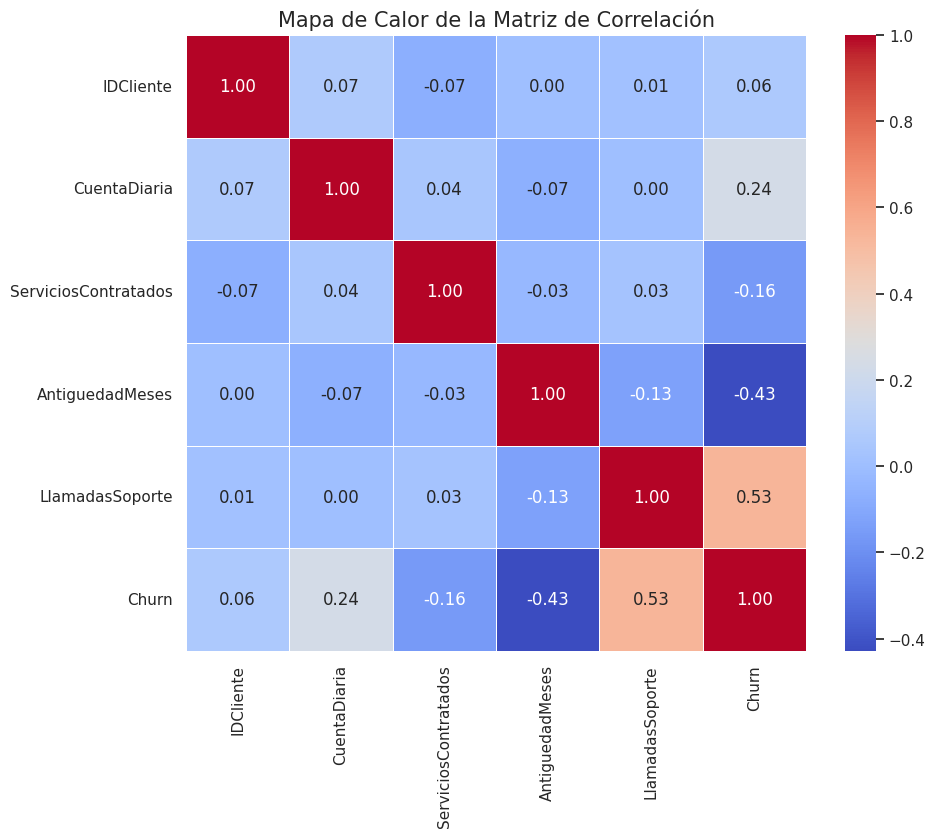

--- Interpretación del Mapa de Calor ---
Observa el mapa de calor:
- Celdas con colores cálidos (rojos/naranjas) indican correlación positiva (si una sube, la otra tiende a subir).
- Celdas con colores fríos (azules) indican correlación negativa (si una sube, la otra tiende a bajar).
- La intensidad del color refleja la fuerza de la correlación (más intenso = más fuerte).
- Valores cercanos a 1 o -1 son correlaciones fuertes. Valores cercanos a 0 son débiles.
Busca la fila o columna 'Churn' para ver qué variables se correlacionan más con la evasión.




<ipython-input-77-668c584bd853>:69: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




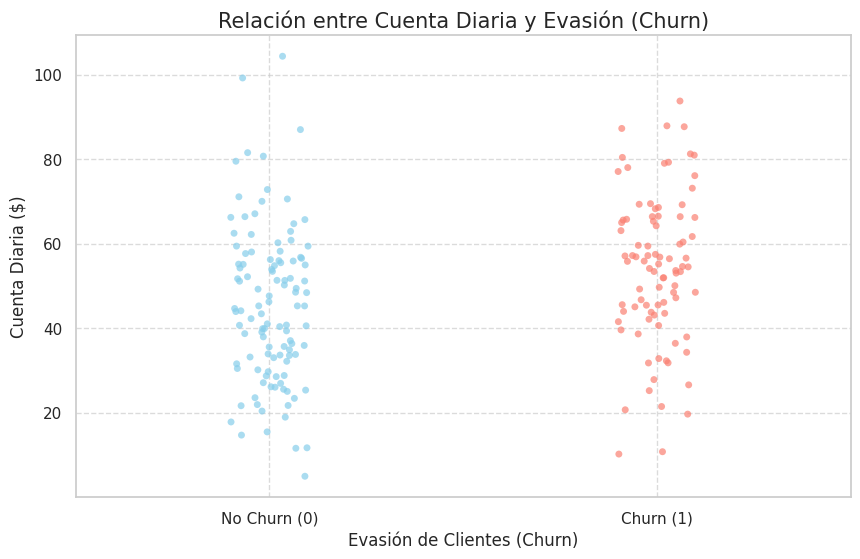

--- Interpretación del Gráfico Cuenta Diaria vs. Churn ---
En el gráfico anterior, cada punto es un cliente.
Observa si los puntos para 'Churn (1)' tienden a estar más arriba (mayor cuenta diaria) o más abajo.
También puedes usar un boxplot para una vista más clara de las distribuciones:


<ipython-input-77-668c584bd853>:83: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




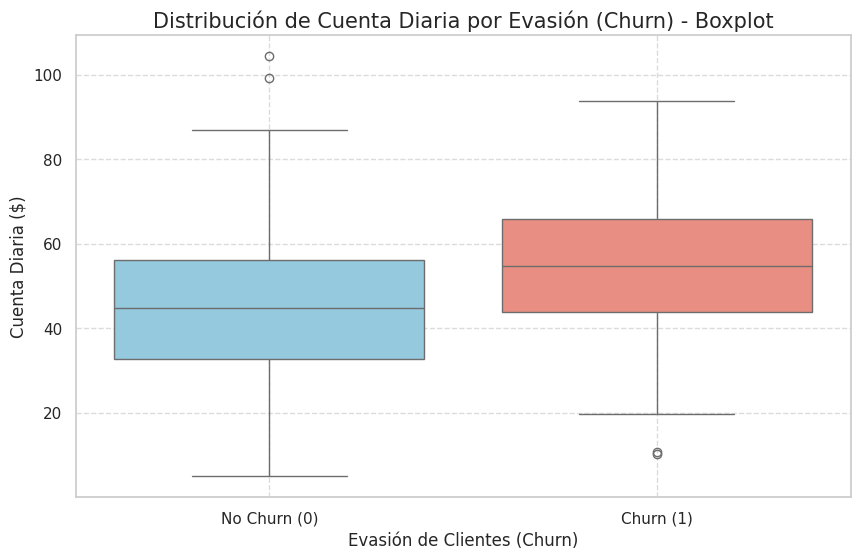

<ipython-input-77-668c584bd853>:95: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




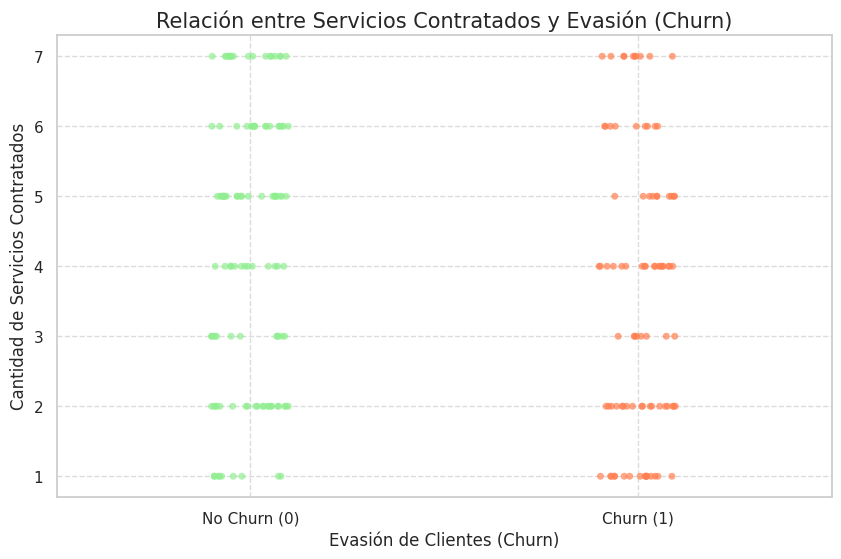

--- Interpretación del Gráfico Servicios Contratados vs. Churn ---
Similar al anterior, observa la distribución de puntos.
¿Los clientes que se van ('Churn (1)') tienen más o menos servicios contratados?
Un boxplot también puede ser útil aquí:


<ipython-input-77-668c584bd853>:109: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




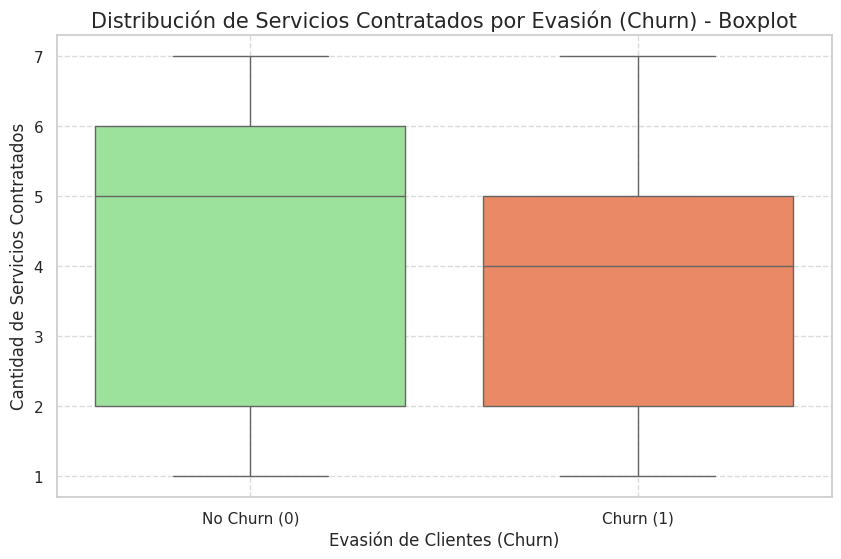



--- Insights para Modelos Predictivos ---
Al observar las correlaciones (tanto en la matriz como en los gráficos específicos):
1. Identificas qué factores parecen influir más en la evasión. Por ejemplo, si 'CuentaDiaria' tiene una correlación positiva fuerte con 'Churn', es un buen candidato para tu modelo.
2. Si 'ServiciosContratados' tiene una correlación negativa con 'Churn', indica que más servicios podrían retener clientes.
3. Variables con correlación cercana a cero con 'Churn' podrían ser menos importantes para predecir la evasión.
Esta información es crucial para seleccionar las variables (features) más relevantes para entrenar un modelo predictivo de churn más robusto y preciso.


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para mejorar la visualización de los gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# --- PASO 1: Crear un Dataset de Ejemplo ---
# En un caso real, cargarías tus datos: df = pd.read_csv('tu_archivo.csv')
# Aquí creamos datos ficticios para ilustrar el proceso.
np.random.seed(42) # Para reproducibilidad

data = {
    'IDCliente': range(1, 201),
    'CuentaDiaria': np.random.normal(loc=50, scale=20, size=200).clip(5, 150), # Gasto diario, entre 5 y 150
    'ServiciosContratados': np.random.randint(1, 8, size=200), # Número de servicios, entre 1 y 7
    'AntiguedadMeses': np.random.randint(1, 72, size=200), # Antigüedad del cliente en meses
    'LlamadasSoporte': np.random.randint(0, 10, size=200), # Número de llamadas a soporte
}
df = pd.DataFrame(data)

# Generar la variable 'Churn' (Evasión) de forma que tenga alguna correlación
# Por ejemplo, mayor cuenta diaria o más llamadas a soporte podrían influir en el churn.
# Menor antigüedad o menos servicios también podrían influir.
prob_churn = (df['CuentaDiaria']/150 + df['LlamadasSoporte']/10 - df['ServiciosContratados']/10 - df['AntiguedadMeses']/72) / 2
prob_churn = (prob_churn - prob_churn.min()) / (prob_churn.max() - prob_churn.min()) # Normalizar entre 0 y 1
df['Churn'] = (prob_churn > np.random.uniform(0.3, 0.7, size=200)).astype(int) # 1 si hay churn, 0 si no

print("--- Primeras filas del Dataset de Ejemplo ---")
print(df.head())
print("\n")

# --- PASO 2: Calcular la Matriz de Correlación ---
# La función .corr() calcula la correlación de Pearson por defecto.
# Esta mide la relación lineal entre variables numéricas.
matriz_correlacion = df.corr()

print("--- Matriz de Correlación Numérica ---")
print(matriz_correlacion)
print("\n")

# --- PASO 3: Visualizar la Matriz de Correlación con un Mapa de Calor (Heatmap) ---
# Un mapa de calor es una excelente forma de ver rápidamente qué variables están más correlacionadas.
# - annot=True: muestra los valores de correlación en cada celda.
# - cmap: define la paleta de colores. 'coolwarm' es buena para ver positivo/negativo.
# - fmt=".2f": formatea los números a dos decimales.
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de la Matriz de Correlación', fontsize=15)
plt.show()

print("--- Interpretación del Mapa de Calor ---")
print("Observa el mapa de calor:")
print("- Celdas con colores cálidos (rojos/naranjas) indican correlación positiva (si una sube, la otra tiende a subir).")
print("- Celdas con colores fríos (azules) indican correlación negativa (si una sube, la otra tiende a bajar).")
print("- La intensidad del color refleja la fuerza de la correlación (más intenso = más fuerte).")
print("- Valores cercanos a 1 o -1 son correlaciones fuertes. Valores cercanos a 0 son débiles.")
print("Busca la fila o columna 'Churn' para ver qué variables se correlacionan más con la evasión.")
print("\n")

# --- PASO 4: Explorar Correlaciones Específicas con Gráficos de Dispersión (o similares) ---

# 🔹 La relación entre la cuenta diaria y la evasión.
plt.figure(figsize=(10, 6))
# Usaremos stripplot que es bueno para una variable categórica (Churn) y una numérica.
# jitter=True ayuda a ver la densidad de puntos cuando hay muchos en la misma posición.
sns.stripplot(x='Churn', y='CuentaDiaria', data=df, jitter=True, alpha=0.7, palette=['skyblue', 'salmon'])
plt.xticks([0, 1], ['No Churn (0)', 'Churn (1)']) # Etiquetas más claras para el eje Churn
plt.title('Relación entre Cuenta Diaria y Evasión (Churn)', fontsize=15)
plt.xlabel('Evasión de Clientes (Churn)', fontsize=12)
plt.ylabel('Cuenta Diaria ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("--- Interpretación del Gráfico Cuenta Diaria vs. Churn ---")
print("En el gráfico anterior, cada punto es un cliente.")
print("Observa si los puntos para 'Churn (1)' tienden a estar más arriba (mayor cuenta diaria) o más abajo.")
print("También puedes usar un boxplot para una vista más clara de las distribuciones:")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='CuentaDiaria', data=df, palette=['skyblue', 'salmon'])
plt.xticks([0, 1], ['No Churn (0)', 'Churn (1)'])
plt.title('Distribución de Cuenta Diaria por Evasión (Churn) - Boxplot', fontsize=15)
plt.xlabel('Evasión de Clientes (Churn)', fontsize=12)
plt.ylabel('Cuenta Diaria ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
print("\n")


# 🔹 Cómo la cantidad de servicios contratados afecta la probabilidad de churn.
plt.figure(figsize=(10, 6))
sns.stripplot(x='Churn', y='ServiciosContratados', data=df, jitter=True, alpha=0.7, palette=['lightgreen', 'coral'])
plt.xticks([0, 1], ['No Churn (0)', 'Churn (1)'])
plt.title('Relación entre Servicios Contratados y Evasión (Churn)', fontsize=15)
plt.xlabel('Evasión de Clientes (Churn)', fontsize=12)
plt.ylabel('Cantidad de Servicios Contratados', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("--- Interpretación del Gráfico Servicios Contratados vs. Churn ---")
print("Similar al anterior, observa la distribución de puntos.")
print("¿Los clientes que se van ('Churn (1)') tienen más o menos servicios contratados?")
print("Un boxplot también puede ser útil aquí:")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='ServiciosContratados', data=df, palette=['lightgreen', 'coral'])
plt.xticks([0, 1], ['No Churn (0)', 'Churn (1)'])
plt.title('Distribución de Servicios Contratados por Evasión (Churn) - Boxplot', fontsize=15)
plt.xlabel('Evasión de Clientes (Churn)', fontsize=12)
plt.ylabel('Cantidad de Servicios Contratados', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
print("\n")

# --- PASO 5: Insights para Modelos Predictivos ---
print("--- Insights para Modelos Predictivos ---")
print("Al observar las correlaciones (tanto en la matriz como en los gráficos específicos):")
print("1. Identificas qué factores parecen influir más en la evasión. Por ejemplo, si 'CuentaDiaria' tiene una correlación positiva fuerte con 'Churn', es un buen candidato para tu modelo.")
print("2. Si 'ServiciosContratados' tiene una correlación negativa con 'Churn', indica que más servicios podrían retener clientes.")
print("3. Variables con correlación cercana a cero con 'Churn' podrían ser menos importantes para predecir la evasión.")
print("Esta información es crucial para seleccionar las variables (features) más relevantes para entrenar un modelo predictivo de churn más robusto y preciso.")


##### **Guardar en HTML y PNG**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64 # Para incrustar imágenes en HTML

# --- Funciones Auxiliares ---
def fig_to_base64(fig):
    """Convierte una figura de Matplotlib a una cadena base64 para HTML."""
    img_buf = io.BytesIO()
    fig.savefig(img_buf, format='png', bbox_inches='tight')
    img_buf.seek(0)
    base64_string = base64.b64encode(img_buf.getvalue()).decode('utf-8')
    img_buf.close()
    return base64_string

# --- Configuración Inicial ---
sns.set_theme(style="whitegrid")
# plt.rcParams['figure.figsize'] = (10, 6) # Se definirá por figura para mejor control

# Lista para almacenar las partes del contenido HTML
html_content_parts = []

# Añadir cabecera HTML
html_content_parts.append("""
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Análisis de Correlación y Evasión de Clientes</title>
    <style>
        body { font-family: Arial, sans-serif; margin: 20px; line-height: 1.6; }
        h1, h2, h3 { color: #333; }
        .dataframe { border-collapse: collapse; margin: 20px 0; font-size: 0.9em; }
        .dataframe th, .dataframe td { border: 1px solid #ddd; padding: 8px; }
        .dataframe th { background-color: #f2f2f2; text-align: left; }
        .plot-container { margin-bottom: 30px; text-align: center; }
        .plot-container img { max-width: 100%; height: auto; border: 1px solid #ccc; }
        pre { background-color: #f5f5f5; padding: 10px; border-radius: 5px; overflow-x: auto;}
    </style>
</head>
<body>
    <h1>Análisis de Correlación y Evasión de Clientes</h1>
""")

# --- PASO 1: Crear un Dataset de Ejemplo ---
np.random.seed(42)
data = {
    'IDCliente': range(1, 201),
    'CuentaDiaria': np.random.normal(loc=50, scale=20, size=200).clip(5, 150),
    'ServiciosContratados': np.random.randint(1, 8, size=200),
    'AntiguedadMeses': np.random.randint(1, 72, size=200),
    'LlamadasSoporte': np.random.randint(0, 10, size=200),
}
df = pd.DataFrame(data)
prob_churn = (df['CuentaDiaria']/150 + df['LlamadasSoporte']/10 - df['ServiciosContratados']/10 - df['AntiguedadMeses']/72) / 2
prob_churn = (prob_churn - prob_churn.min()) / (prob_churn.max() - prob_churn.min())
df['Churn'] = (prob_churn > np.random.uniform(0.3, 0.7, size=200)).astype(int)

html_content_parts.append("<h2>Primeras filas del Dataset de Ejemplo</h2>")
print("--- Primeras filas del Dataset de Ejemplo ---")
print(df.head())
html_content_parts.append(df.head().to_html(classes='dataframe', border=0))

# --- PASO 2: Calcular la Matriz de Correlación ---
matriz_correlacion = df.corr()
html_content_parts.append("<h2>Matriz de Correlación Numérica</h2>")
print("\n--- Matriz de Correlación Numérica ---")
print(matriz_correlacion)
html_content_parts.append(matriz_correlacion.to_html(classes='dataframe', border=0))

# --- PASO 3: Visualizar la Matriz de Correlación con un Mapa de Calor (Heatmap) ---
html_content_parts.append("<h2>Mapa de Calor de la Matriz de Correlación</h2>")
fig_heatmap, ax_heatmap = plt.subplots(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax_heatmap)
ax_heatmap.set_title('Mapa de Calor de la Matriz de Correlación', fontsize=15)

# Guardar como PNG
heatmap_png_file = 'correlation_heatmap.png'
fig_heatmap.savefig(heatmap_png_file, bbox_inches='tight')
print(f"\nMapa de calor guardado como: {heatmap_png_file}")

# Incrustar en HTML
html_content_parts.append(f"<div class='plot-container'><img src='data:image/png;base64,{fig_to_base64(fig_heatmap)}' alt='Mapa de Calor'></div>")
plt.close(fig_heatmap) # Cerrar la figura para liberar memoria

html_content_parts.append("""
<h3>Interpretación del Mapa de Calor:</h3>
<p>Observa el mapa de calor:</p>
<ul>
    <li>Celdas con colores cálidos (rojos/naranjas) indican correlación positiva.</li>
    <li>Celdas con colores fríos (azules) indican correlación negativa.</li>
    <li>La intensidad del color refleja la fuerza de la correlación.</li>
    <li>Valores cercanos a 1 o -1 son correlaciones fuertes. Valores cercanos a 0 son débiles.</li>
    <li>Busca la fila o columna 'Churn' para ver qué variables se correlacionan más con la evasión.</li>
</ul>
""")

# --- PASO 4: Explorar Correlaciones Específicas ---

# 🔹 Relación entre cuenta diaria y evasión
html_content_parts.append("<h2>Relación entre Cuenta Diaria y Evasión (Churn)</h2>")

# Stripplot
fig_strip_cuenta, ax_strip_cuenta = plt.subplots(figsize=(10, 6))
sns.stripplot(x='Churn', y='CuentaDiaria', data=df, jitter=True, alpha=0.7, palette=['skyblue', 'salmon'], ax=ax_strip_cuenta)
ax_strip_cuenta.set_xticks([0, 1])
ax_strip_cuenta.set_xticklabels(['No Churn (0)', 'Churn (1)'])
ax_strip_cuenta.set_title('Stripplot: Cuenta Diaria vs. Evasión', fontsize=15)
ax_strip_cuenta.set_xlabel('Evasión de Clientes (Churn)', fontsize=12)
ax_strip_cuenta.set_ylabel('Cuenta Diaria ($)', fontsize=12)
ax_strip_cuenta.grid(True, linestyle='--', alpha=0.7)

strip_cuenta_png_file = 'stripplot_cuenta_churn.png'
fig_strip_cuenta.savefig(strip_cuenta_png_file, bbox_inches='tight')
print(f"Gráfico stripplot (Cuenta vs Churn) guardado como: {strip_cuenta_png_file}")
html_content_parts.append(f"<div class='plot-container'><img src='data:image/png;base64,{fig_to_base64(fig_strip_cuenta)}' alt='Stripplot Cuenta vs Churn'></div>")
plt.close(fig_strip_cuenta)

# Boxplot
fig_box_cuenta, ax_box_cuenta = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Churn', y='CuentaDiaria', data=df, palette=['skyblue', 'salmon'], ax=ax_box_cuenta)
ax_box_cuenta.set_xticks([0, 1])
ax_box_cuenta.set_xticklabels(['No Churn (0)', 'Churn (1)'])
ax_box_cuenta.set_title('Boxplot: Distribución de Cuenta Diaria por Evasión', fontsize=15)
ax_box_cuenta.set_xlabel('Evasión de Clientes (Churn)', fontsize=12)
ax_box_cuenta.set_ylabel('Cuenta Diaria ($)', fontsize=12)
ax_box_cuenta.grid(True, linestyle='--', alpha=0.7)

box_cuenta_png_file = 'boxplot_cuenta_churn.png'
fig_box_cuenta.savefig(box_cuenta_png_file, bbox_inches='tight')
print(f"Gráfico boxplot (Cuenta vs Churn) guardado como: {box_cuenta_png_file}")
html_content_parts.append(f"<div class='plot-container'><img src='data:image/png;base64,{fig_to_base64(fig_box_cuenta)}' alt='Boxplot Cuenta vs Churn'></div>")
plt.close(fig_box_cuenta)

html_content_parts.append("""
<p>En estos gráficos, observa si los clientes que hacen 'Churn (1)' tienden a tener cuentas diarias diferentes (más altas o más bajas) en comparación con los que no hacen 'Churn (0)'. El boxplot ayuda a ver la mediana y la dispersión de los datos para cada grupo.</p>
""")


# 🔹 Relación entre servicios contratados y evasión
html_content_parts.append("<h2>Relación entre Servicios Contratados y Evasión (Churn)</h2>")

# Stripplot
fig_strip_serv, ax_strip_serv = plt.subplots(figsize=(10, 6))
sns.stripplot(x='Churn', y='ServiciosContratados', data=df, jitter=True, alpha=0.7, palette=['lightgreen', 'coral'], ax=ax_strip_serv)
ax_strip_serv.set_xticks([0, 1])
ax_strip_serv.set_xticklabels(['No Churn (0)', 'Churn (1)'])
ax_strip_serv.set_title('Stripplot: Servicios Contratados vs. Evasión', fontsize=15)
ax_strip_serv.set_xlabel('Evasión de Clientes (Churn)', fontsize=12)
ax_strip_serv.set_ylabel('Cantidad de Servicios Contratados', fontsize=12)
ax_strip_serv.grid(True, linestyle='--', alpha=0.7)

strip_serv_png_file = 'stripplot_servicios_churn.png'
fig_strip_serv.savefig(strip_serv_png_file, bbox_inches='tight')
print(f"Gráfico stripplot (Servicios vs Churn) guardado como: {strip_serv_png_file}")
html_content_parts.append(f"<div class='plot-container'><img src='data:image/png;base64,{fig_to_base64(fig_strip_serv)}' alt='Stripplot Servicios vs Churn'></div>")
plt.close(fig_strip_serv)

# Boxplot
fig_box_serv, ax_box_serv = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Churn', y='ServiciosContratados', data=df, palette=['lightgreen', 'coral'], ax=ax_box_serv)
ax_box_serv.set_xticks([0, 1])
ax_box_serv.set_xticklabels(['No Churn (0)', 'Churn (1)'])
ax_box_serv.set_title('Boxplot: Distribución de Servicios Contratados por Evasión', fontsize=15)
ax_box_serv.set_xlabel('Evasión de Clientes (Churn)', fontsize=12)
ax_box_serv.set_ylabel('Cantidad de Servicios Contratados', fontsize=12)
ax_box_serv.grid(True, linestyle='--', alpha=0.7)

box_serv_png_file = 'boxplot_servicios_churn.png'
fig_box_serv.savefig(box_serv_png_file, bbox_inches='tight')
print(f"Gráfico boxplot (Servicios vs Churn) guardado como: {box_serv_png_file}")
html_content_parts.append(f"<div class='plot-container'><img src='data:image/png;base64,{fig_to_base64(fig_box_serv)}' alt='Boxplot Servicios vs Churn'></div>")
plt.close(fig_box_serv)

html_content_parts.append("""
<p>De manera similar, analiza si la cantidad de servicios contratados difiere entre los clientes que se van y los que se quedan. ¿Tener más o menos servicios parece estar asociado con el churn?</p>
""")


# --- PASO 5: Insights para Modelos Predictivos ---
html_content_parts.append("<h2>Insights para Modelos Predictivos</h2>")
html_content_parts.append("""
<p>Al observar las correlaciones (tanto en la matriz como en los gráficos específicos):</p>
<ul>
    <li>Identificas qué factores parecen influir más en la evasión. Por ejemplo, si 'CuentaDiaria' tiene una correlación positiva fuerte con 'Churn', es un buen candidato para tu modelo.</li>
    <li>Si 'ServiciosContratados' tiene una correlación negativa con 'Churn', indica que más servicios podrían retener clientes.</li>
    <li>Variables con correlación cercana a cero con 'Churn' podrían ser menos importantes para predecir la evasión.</li>
</ul>
<p>Esta información es crucial para seleccionar las variables (features) más relevantes para entrenar un modelo predictivo de churn más robusto y preciso.</p>
""")

# Cerrar etiquetas HTML
html_content_parts.append("""
</body>
</html>
""")

# Unir todas las partes del HTML y guardarlo en un archivo
final_html_content = "".join(html_content_parts)
html_file_name = 'analisis_correlacion_churn.html'
with open(html_file_name, 'w', encoding='utf-8') as f:
    f.write(final_html_content)

print(f"\nInforme HTML guardado como: {html_file_name}")
print("Todos los gráficos PNG también han sido guardados en el directorio actual.")

--- Primeras filas del Dataset de Ejemplo ---
   IDCliente  CuentaDiaria  ServiciosContratados  AntiguedadMeses  \
0          1     59.934283                     2                7   
1          2     47.234714                     2               68   
2          3     62.953771                     1               58   
3          4     80.460597                     1               29   
4          5     45.316933                     1               36   

   LlamadasSoporte  Churn  
0                6      1  
1                5      1  
2                1      0  
3                5      1  
4                1      0  

--- Matriz de Correlación Numérica ---
                      IDCliente  CuentaDiaria  ServiciosContratados  \
IDCliente              1.000000      0.070715             -0.074742   
CuentaDiaria           0.070715      1.000000              0.043761   
ServiciosContratados  -0.074742      0.043761              1.000000   
AntiguedadMeses        0.001390     -0.066534  